In [5]:
from pgmpy.models import MarkovModel, BayesianModel
from pgmpy.factors import Factor
from pgmpy.readwrite import XMLBIFWriter
from pgmpy.inference import BeliefPropagation
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import time as time
import matplotlib.pyplot as plt
from pgmpy.inference import VariableElimination
import time
%pylab inline
import sys
sys.path.insert(0, "../")
from ESP_Markov_Model_Client_Lifetime import ESP_Joint_Product_Probabilities, ESP_Markov_Model_Joint_Prob

Populating the interactive namespace from numpy and matplotlib


# Analysis of the dynamic Markov model
- input a week number into the argument week_n_one_time. Can also add evdience (i.e. a client has product 1 and 2)
- outputs a probability of each product given any evidence present

In [11]:
checking, cmma, mmb , cm, fx, loc, es = ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,
                                                                    week_n_one_time=1,evidence_=None) 

In [16]:
print("Probability of {} is {:%}".format('checking',checking))
print("Probability of {} is {:%}".format('cmma',cmma))
print("Probability of {} is {:%}".format('mmb',mmb))
print("Probability of {} is {:%}".format('cm',cm))
print("Probability of {} is {:%}".format('fx',fx))
print("Probability of {} is {:%}".format('loc',loc))
print("Probability of {} is {:%}".format('es',es))

Probability of checking is 99.999989%
Probability of cmma is 1.454671%
Probability of mmb is 1.744918%
Probability of cm is 0.240279%
Probability of fx is 0.000010%
Probability of loc is 0.000010%
Probability of es is 0.009286%


## Plot the distribution of different products over time
### Start with no evidence with any products

In [21]:
## new probs - combo


probs_noevidence = [ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=i,
                                          evidence_=None) for i in range(152)]




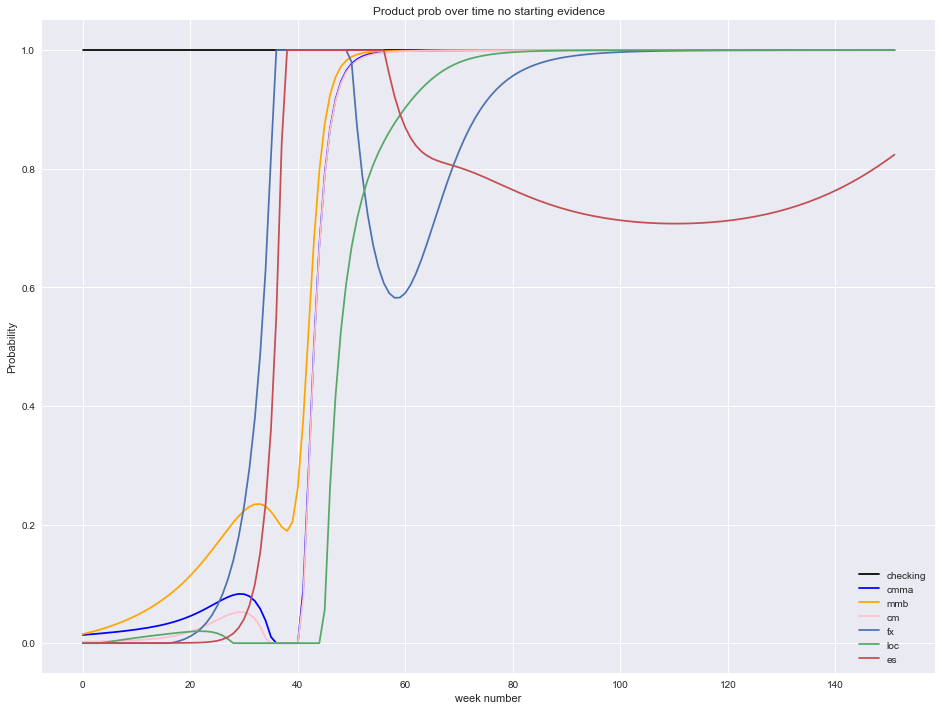

In [22]:
## FINAL - new probs - combo
plt.figure(figsize=(16,12))
plt.plot([probs_noevidence[i][0] for i in range(len(probs_combo))],label='checking',color='black')
plt.plot([probs_noevidence[i][1] for i in range(len(probs_combo))],label='cmma',color='blue')
plt.plot([probs_noevidence[i][2] for i in range(len(probs_combo))],label='mmb',color='orange')
plt.plot([probs_noevidence[i][3] for i in range(len(probs_combo))],label='cm',color='pink')
plt.plot([probs_noevidence[i][4] for i in range(len(probs_combo))],label='fx')
plt.plot([probs_noevidence[i][5] for i in range(len(probs_combo))],label='loc')
plt.plot([probs_noevidence[i][6] for i in range(len(probs_combo))],label='es')
plt.legend()
plt.title('Product prob over time no starting evidence')
plt.xlabel('week number')
plt.ylabel('Probability')

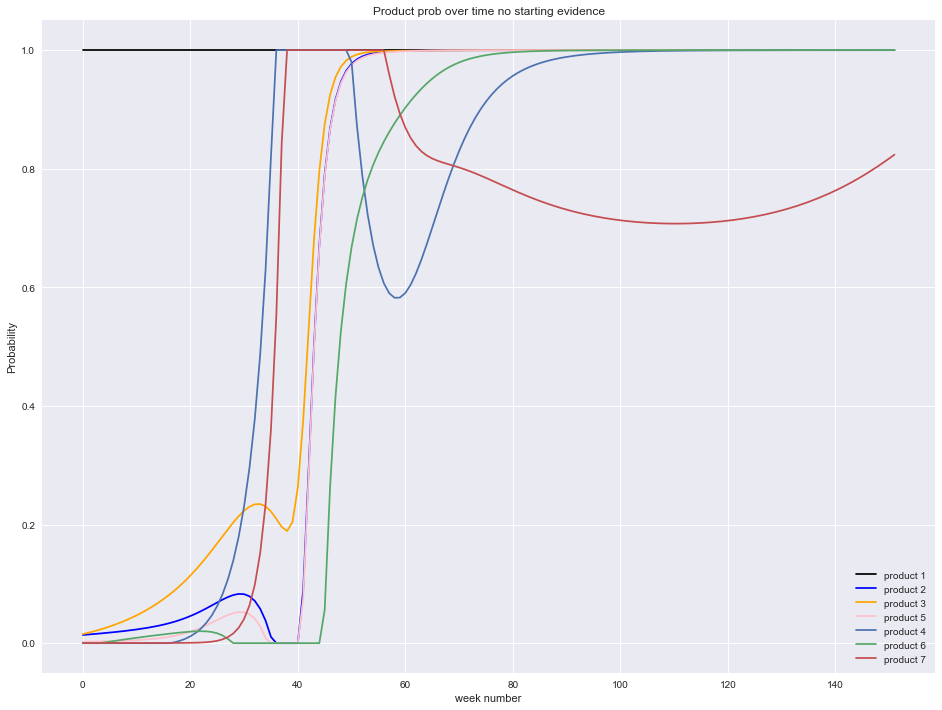

In [25]:

plt.figure(figsize=(16,12))
plt.plot([probs_noevidence[i][0] for i in range(len(probs_combo))],label='product 1',color='black')
plt.plot([probs_noevidence[i][1] for i in range(len(probs_combo))],label='product 2',color='blue')
plt.plot([probs_noevidence[i][2] for i in range(len(probs_combo))],label='product 3',color='orange')
plt.plot([probs_noevidence[i][3] for i in range(len(probs_combo))],label='product 5',color='pink')
plt.plot([probs_noevidence[i][4] for i in range(len(probs_combo))],label='product 4')
plt.plot([probs_noevidence[i][5] for i in range(len(probs_combo))],label='product 6')
plt.plot([probs_noevidence[i][6] for i in range(len(probs_combo))],label='product 7')
plt.legend()
plt.title('Product prob over time no starting evidence')
plt.xlabel('week number')
plt.ylabel('Probability')

## Next, look at starting with a checking account and nothing else

In [17]:
## new probs - combo


probs_combo = [ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=i,
                                          evidence_={'money_market_bonus':0,'collateral_mma':0,
                                                       'cash_management':0,'enterprise_sweep':0,
                                    'fx_products':1,'letters_of_credit':0,'checking_usd':1}) for i in range(152)]




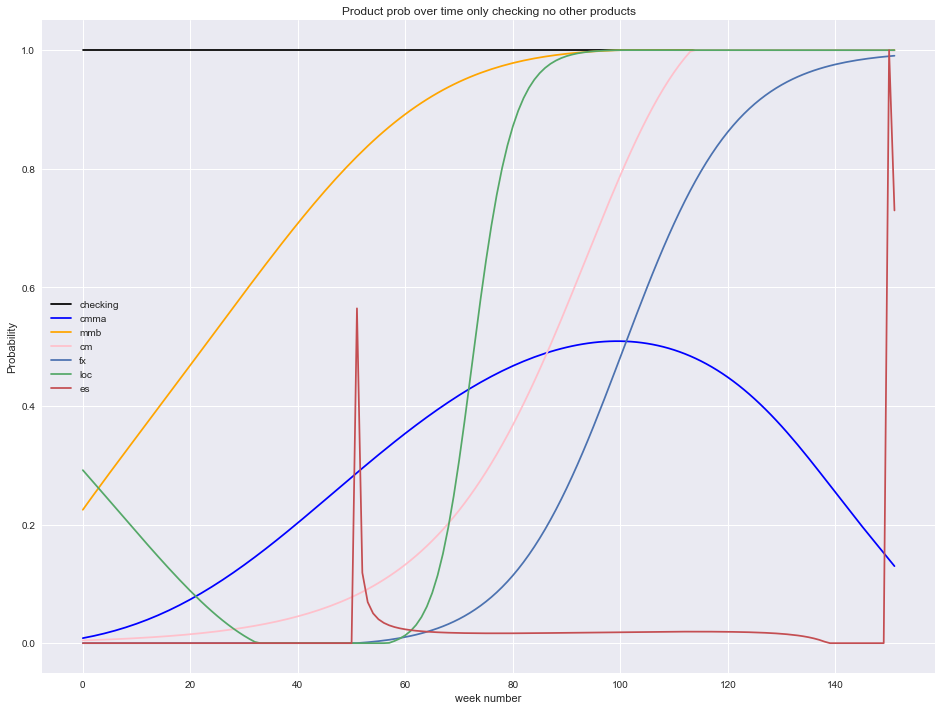

In [18]:
## FINAL - new probs - combo
plt.figure(figsize=(16,12))
plt.plot([probs_combo[i][0] for i in range(len(probs_combo))],label='checking',color='black')
plt.plot([probs_combo[i][1] for i in range(len(probs_combo))],label='cmma',color='blue')
plt.plot([probs_combo[i][2] for i in range(len(probs_combo))],label='mmb',color='orange')
plt.plot([probs_combo[i][3] for i in range(len(probs_combo))],label='cm',color='pink')
plt.plot([probs_combo[i][4] for i in range(len(probs_combo))],label='fx')
plt.plot([probs_combo[i][5] for i in range(len(probs_combo))],label='loc')
plt.plot([probs_combo[i][6] for i in range(len(probs_combo))],label='es')
#plt.plot([probs[i][7] for i in range(len(probs))],label='ORIGINAL CHECKING')
plt.legend()
plt.title('Product prob over time only checking no other products')
plt.xlabel('week number')
plt.ylabel('Probability')

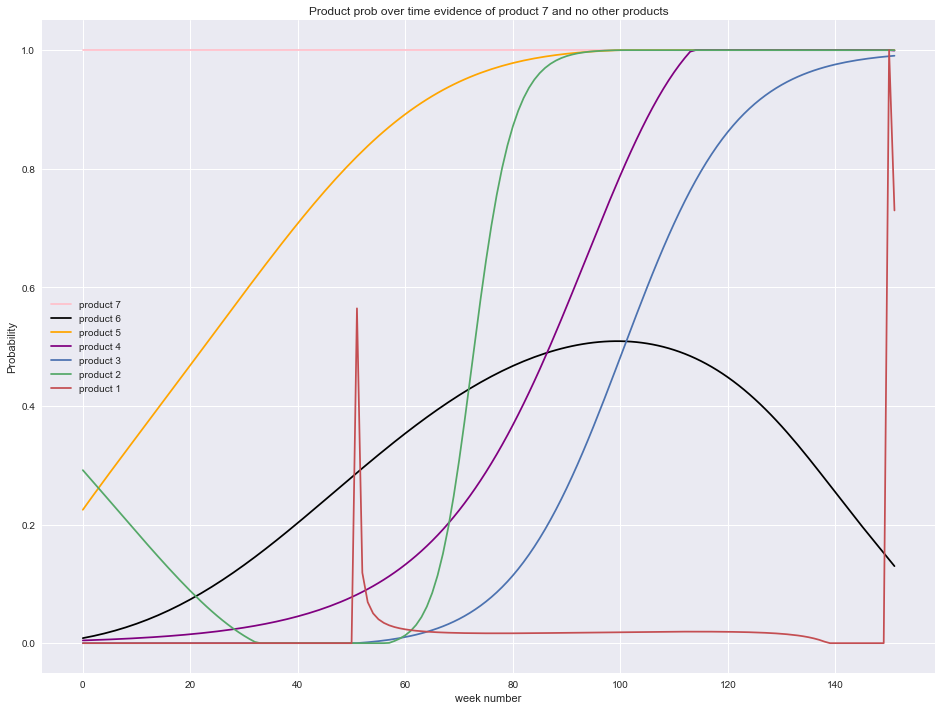

In [37]:
## FINAL - new probs - combo
plt.figure(figsize=(16,12))
plt.plot([probs_combo[i][0] for i in range(len(probs_combo))],label='product 7',color='pink')
plt.plot([probs_combo[i][1] for i in range(len(probs_combo))],label='product 6',color='black')
plt.plot([probs_combo[i][2] for i in range(len(probs_combo))],label='product 5',color='orange')
plt.plot([probs_combo[i][3] for i in range(len(probs_combo))],label='product 4',color='purple')
plt.plot([probs_combo[i][4] for i in range(len(probs_combo))],label='product 3')
plt.plot([probs_combo[i][5] for i in range(len(probs_combo))],label='product 2')
plt.plot([probs_combo[i][6] for i in range(len(probs_combo))],label='product 1')
#plt.plot([probs[i][7] for i in range(len(probs))],label='ORIGINAL CHECKING')
plt.legend()
plt.title('Product prob over time evidence of product 7 and no other products')
plt.xlabel('week number')
plt.ylabel('Probability')

## Next, look at starting with no products

In [27]:
probs_allzero = [ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=i,
                                          evidence_={'money_market_bonus':0,'collateral_mma':0,
                                                       'cash_management':0,'enterprise_sweep':0,
                                    'fx_products':1,'letters_of_credit':0,'checking_usd':0}) for i in range(152)]

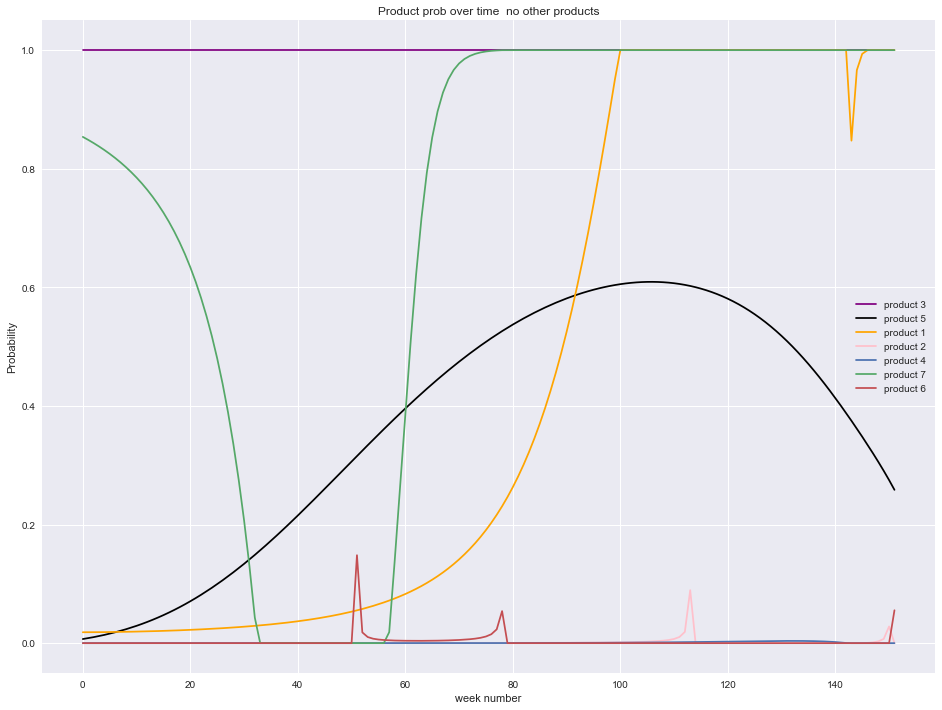

In [35]:
## FINAL - new probs - combo
plt.figure(figsize=(16,12))
plt.plot([probs_allzero[i][0] for i in range(len(probs_allzero))],label='product 3',color='purple')
plt.plot([probs_allzero[i][1] for i in range(len(probs_allzero))],label='product 5',color='black')
plt.plot([probs_allzero[i][2] for i in range(len(probs_allzero))],label='product 1',color='orange')
plt.plot([probs_allzero[i][3] for i in range(len(probs_allzero))],label='product 2',color='pink')
plt.plot([probs_allzero[i][4] for i in range(len(probs_allzero))],label='product 4')
plt.plot([probs_allzero[i][5] for i in range(len(probs_allzero))],label='product 7')
plt.plot([probs_allzero[i][6] for i in range(len(probs_allzero))],label='product 6')
#plt.plot([probs[i][7] for i in range(len(probs))],label='ORIGINAL CHECKING')
plt.legend()
plt.title('Product prob over time  no other products')
plt.xlabel('week number')
plt.ylabel('Probability')

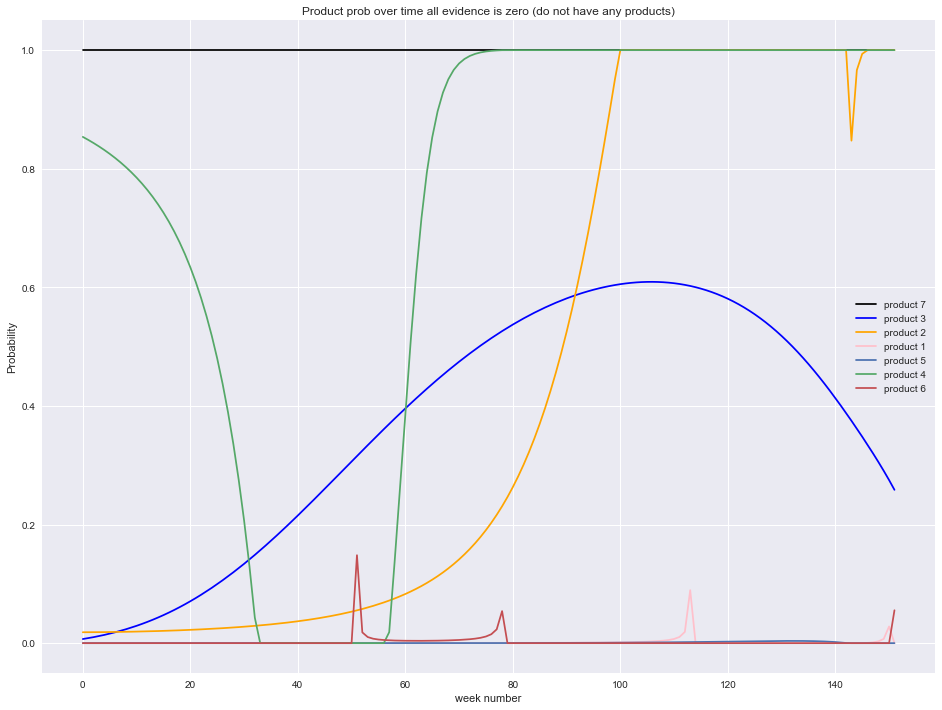

In [33]:
## FINAL - new probs - combo
plt.figure(figsize=(16,12))
plt.plot([probs_allzero[i][0] for i in range(len(probs_allzero))],label='product 7',color='black')
plt.plot([probs_allzero[i][1] for i in range(len(probs_allzero))],label='product 3',color='blue')
plt.plot([probs_allzero[i][2] for i in range(len(probs_allzero))],label='product 2',color='orange')
plt.plot([probs_allzero[i][3] for i in range(len(probs_allzero))],label='product 1',color='pink')
plt.plot([probs_allzero[i][4] for i in range(len(probs_allzero))],label='product 5')
plt.plot([probs_allzero[i][5] for i in range(len(probs_allzero))],label='product 4')
plt.plot([probs_allzero[i][6] for i in range(len(probs_allzero))],label='product 6')
#plt.plot([probs[i][7] for i in range(len(probs))],label='ORIGINAL CHECKING')
plt.legend()
plt.title('Product prob over time all evidence is zero (do not have any products)')
plt.xlabel('week number')
plt.ylabel('Probability')

## CLient Lifetime - units are months

In [92]:
exponential_lifetime_parameters = (2.9999999999982676, 11.500665661185888)

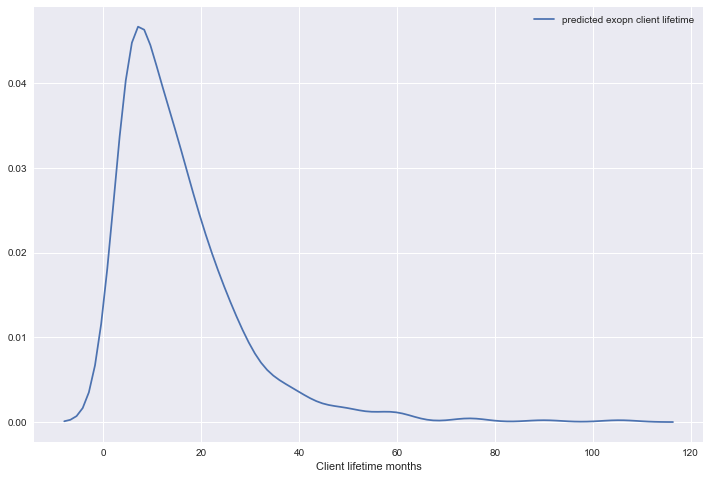

In [93]:
plt.figure(figsize=(12,8))
sns.kdeplot(stats.expon(*exponential_lifetime_parameters ).rvs(500), label='predicted exopn client lifetime')
plt.xlabel('Client lifetime months')

In [74]:
round(stats.expon(*exponential_lifetime_parameters ).rvs())

5.0

# Time how long this will take
-  to run the simlation model

In [248]:
time = np.array([0,1,2,3,4,5,6,9,14])
seconds = np.array([ 7.3,24,56,114 , 179, 264,294,620, 1357])

In [201]:
time_projection_linear = np.polyfit(time,seconds,1)
print(time_projection_linear)

[  95.51656977 -143.04767442]


In [202]:
time_projection_poly = np.polyfit(time,seconds,2)
print(time_projection_poly)

[  5.5267672   19.06563452   4.72908346]


In [203]:
time_projection_y_linear = np.poly1d(time_projection_linear)

In [204]:
time_projection_y_poly = np.poly1d(time_projection_poly)

In [205]:
print(time_projection_y)

 
52.25 x - 22.72


In [206]:
time_projection_y(2)

81.789285714285768

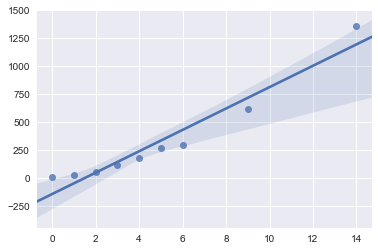

In [207]:
sns.regplot(time,seconds)

In [10]:
plt.figure(figsize=(12,8))
plt.plot(np.array([time_projection_y_linear(i) for i in range(17)]),label = 'projected linear')
plt.plot(np.array([time_projection_y_poly(i) for i in range(17)]),label = 'projected poly')
plt.scatter(time,seconds,label='original')
plt.xlabel('week number')
plt.ylabel('Seconds')
plt.legend()

NameError: name 'time_projection_y_linear' is not defined

In [211]:
# linear time
print('Running two years will take {} minutes in linear '.format(time_projection_y_linear(104)/60))

Running two years will take 163.17792635658915 minutes in linear 


In [215]:
# poly
print('Running two years will take {} minutes poly or {} hours'.format(time_projection_y_poly(104)/60,
                                                                       time_projection_y_poly(104)/60/60))

Running two years will take 1029.4178185730348 minutes poly or 17.156963642883913 hours


In [218]:
time_projection_y_poly(52)/60/60

4.4279223857875687

In [242]:
time_projection_y_poly(34)/60/60

1.9560843169590609

In [243]:
4.42 - 1.95

2.4699999999999998

In [241]:
# time projection on aws

In [264]:
time_ec2 = np.array([0,1,2,3,4,5,6,7,11])
seconds_ec2 = np.array([ 6.14,17,50,65 , 112, 160,  244, 261, 601])

In [265]:
time_projection_poly_ec2 = np.polyfit(time_ec2,seconds_ec2,2)
print(time_projection_poly_ec2)

[  3.75664037  12.99484648   3.20642786]


In [266]:
time_projection_y_poly_ec2 = np.poly1d(time_projection_poly_ec2)

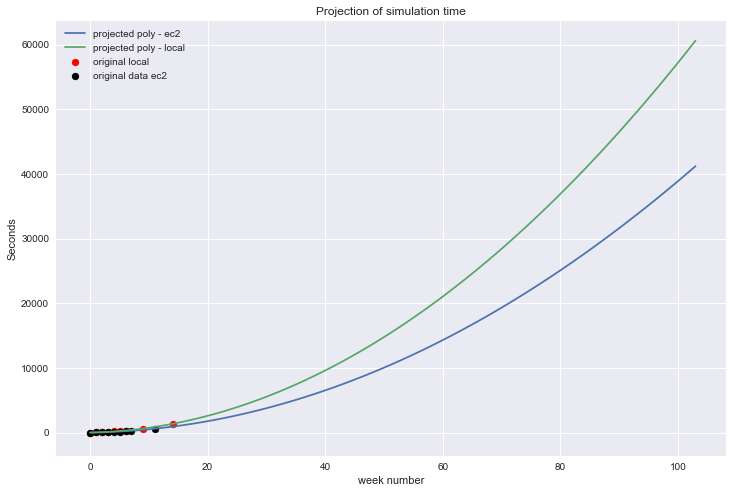

In [272]:
plt.figure(figsize=(12,8))
plt.plot(np.array([time_projection_y_poly_ec2(i) for i in range(104)]),label = 'projected poly - ec2')
plt.plot(np.array([time_projection_y_poly(i) for i in range(104)]),label = 'projected poly - local')
plt.scatter(time,seconds,label='original local', color = 'red')
plt.scatter(time_ec2,seconds_ec2 , label = 'original data ec2', color = 'black')
plt.xlabel('week number')
plt.ylabel('Seconds')
plt.legend()
plt.title('Projection of simulation time')

In [270]:
time_projection_y_poly_ec2(104)/60/60

11.662914638711204

In [284]:
print('EC2 will save {:%} percent time or {} hours'.format((17.15-11.66)/17.16, 17.15 - 11.66))

EC2 will save 31.993007% percent time or 5.489999999999998 hours
